#### Beat detection

In [20]:
import pandas as pd
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

current_directory = os.getcwd()
print(f"\nCurrent working directory: {current_directory}\n")

path_data = "Datasets/groove"
filename = os.path.join(path_data, "info.csv")

data = pd.read_csv(filename, encoding="latin-1")
data.head()


Current working directory: /Users/vinni/Desktop/Code/Audio Data Science/StyleExtraction



,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,27.872308,test
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,102,beat,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,37.691158,test
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,105,beat,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,36.351218,test
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,86,beat,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,44.716543,test
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,80,beat,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,47.987500,test


In [ ]:
data.hea

#### Extraktion des Spektogrammes für das CNN

Datasets/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.wav
calculating  Datasets/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.wav
bla
None
Datasets/groove/drummer1/eval_session/10_soul-groove10_102_beat_4-4.wav
calculating  Datasets/groove/drummer1/eval_session/10_soul-groove10_102_beat_4-4.wav
bla
None
Datasets/groove/drummer1/eval_session/2_funk-groove2_105_beat_4-4.wav
calculating  Datasets/groove/drummer1/eval_session/2_funk-groove2_105_beat_4-4.wav
bla
None
Datasets/groove/drummer1/eval_session/3_soul-groove3_86_beat_4-4.wav
calculating  Datasets/groove/drummer1/eval_session/3_soul-groove3_86_beat_4-4.wav
bla
None
Datasets/groove/drummer1/eval_session/4_soul-groove4_80_beat_4-4.wav
calculating  Datasets/groove/drummer1/eval_session/4_soul-groove4_80_beat_4-4.wav
bla
None


KeyboardInterrupt: 

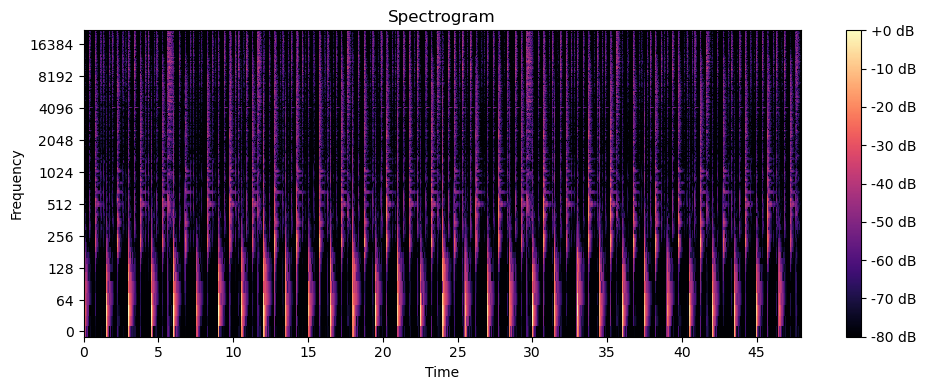

In [25]:
audio_path = "Datasets/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.wav"

y, sr = librosa.load(audio_path, sr=None)

# erstellen des Spectogramms
# Berechnung des STFT
D = librosa.stft(y)  # STFT des Audiosignals
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)  # Konvertieren der Amplitude in Dezibel

#Speichern des Spektogramms als Bild
# Spektrogramm als Bild speichern
def save_spectrogram_image(S_db, sr, output_path):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(output_path, format='png')
    plt.close()

# Beispielaufruf der Funktion
output_path = 'Datasets/spectrums/1_funk-groove1_138_beat_4-4.png'
#save_spectrogram_image(S_db, sr, output_path)

# Verzeichnisstrukturen
audio_base_path = "Datasets/groove"
spectrum_base_path = "Datasets/spectrums"

for index, row in data.iterrows():
    audio_path = os.path.join(audio_base_path, row["audio_filename"])
    
    # Erstellen des Ausgabe-Pfads
    relative_path = os.path.relpath(audio_path, audio_base_path)
    spectrum_path = os.path.join(spectrum_base_path, relative_path)
    spectrum_dir = os.path.dirname(spectrum_path)

    if os.path.exists(spectrum_path):
        print(f"File already: {spectrum_path}")
        continue

    # Audio laden (als numpy-Array (y) und die samplerate (sr))
    try:
        y, sr = librosa.load(audio_path, sr=None)
    except Exception as e:
        print(f"Error loading {audio_path}: {e}")
        continue

    # Erstellen des Spektrogramms
    # Berechnung des STFT
    D = librosa.stft(y)  # STFT des Audiosignals
    S_db = librosa.amplitude_to_db(abs(D), ref=np.max)  # Konvertieren der Amplitude in Dezibel

    # Ersetzen der Dateiendung .wav durch .png
    spectrum_path = spectrum_path.replace('.wav', '.png')

    # Sicherstellen, dass das Zielverzeichnis existiert
    print(os.makedirs(spectrum_dir, exist_ok=True))
    
    # Speichern des Spektrogrammbilds
    save_spectrogram_image(S_db, sr, spectrum_path)






### Feature Extraktion
Für das Projekt relevante Descriptoren könnten sein:
- Onset erkennung (Zeitlich) -> __rhytmische Merkmale__
    - Onset Function
        - Wahrscheinlichkeit für jeden Zeitpunkt (Frame), dass ein Ereigniss (Onset) stattfindet
    - Spectral Flux 
        - misst die Veränderung im Spektrum zwischen aufeinanderfolgenden Frames (wie Stark ist die Veränderung der Frames)
        - Onset erkennung
- Spektrale Desktiptoren/ Dynamik des Signals -> __spektrale Merkmale__
    - MFCCs 
        - repräsentieren die Kurzzeit-Leistungsdichte eines Audiosignals, basierend auf einer Mel-Skala-Frequenzachse 
        - gut für Klangfarben und Spektralcharakteristika der Loops
    - Spectral Contrast
        - Spectral Contrast misst den Unterschied zwischen Spitzen- und Talpegeln im Spektrum
        - gut um die Dynamik der Loops zu erfassen
    - Tonnetz 
        - harmonische und rythmische Struktur des Loops
        - Zwar eher im harmonischen Kontext aber gibt trotzdem auskunft über die relative Häufigkeit und die Verteilung von harmonischen und rythmischen Elementen
    - RMS Energy (Root Mean Square Energy)
        - durchschnittliche Leistung des Audiosignals über einen Zeitraum
    - Spectral Centroid
        - Schwerpunkt des Frequenzspektrums (Wie hoch ist derf Anteil Tieffrequenter Signale)
    - Spectral Roll-off

##### Rhytmische Merkmale

Onset Funktion 

In [ ]:
import os
import pandas as pd
import librosa
import numpy as np

# Initialisieren der neuen Spalten mit None
new_columns = [
    "onset_env_mean", "onset_env_std", "mfcc_mean", "mfcc_std", 
    "spectral_flux_mean", "spectral_flux_std", "spectral_contrast_mean", 
    "spectral_contrast_std", "tonnetz_mean", "tonnetz_std", "rms_mean", 
    "rms_std", "spectral_centroid_mean", "spectral_centroid_std", 
    "spectral_bandwidth_mean", "spectral_bandwidth_std", 
    "spectral_flatness_mean", "spectral_flatness_std", "tempogram_mean" ,"tempogram_std"
]

for col in new_columns:
    data[col] = None

# Iteration über den DataFrame
for index, row in data.iterrows():
    audio_path = os.path.join("Datasets/groove", row["audio_filename"])
    
    if not os.path.exists(audio_path):
        print(f"File not found: {audio_path}")
        continue

    # Audio laden (als numpy-Array (y) und die samplerate (sr))
    try:
        y, sr = librosa.load(audio_path, sr=None)
    except Exception as e:
        print(f"Error loading {audio_path}: {e}")
        continue
    
    # Dynamisch n_fft basierend auf der Länge des Audiosignals setzen
    n_fft = min(512, len(y) // 2)
    hop_length = n_fft // 2
    
    # Berechnung der Merkmale
    onset_env = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
    onset_env_mean = onset_env.mean()
    onset_env_std = onset_env.std()
    
    # Berechnen des STFT und des Spectral Flux
    stft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    spectral_flux = np.sqrt(np.mean((np.diff(stft, axis=1))**2, axis=0))
    spectral_flux_mean = spectral_flux.mean()
    spectral_flux_std = spectral_flux.std()

    # Reduziere n_mels und passe fmax an, um leere Filter zu vermeiden
    n_mels = 40
    fmax = sr / 2

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmax=fmax)
    mfcc_mean = mfcc.mean()
    mfcc_std = mfcc.std()

    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    spectral_contrast_mean = spectral_contrast.mean()
    spectral_contrast_std = spectral_contrast.std()

    tonnetz = librosa.feature.tonnetz(y=y, sr=sr, hop_length=hop_length)
    tonnetz_mean = tonnetz.mean()
    tonnetz_std = tonnetz.std()

    rms = librosa.feature.rms(y=y, frame_length=n_fft, hop_length=hop_length)
    rms_mean = rms.mean()
    print(rms_mean)
    rms_std = rms.std()

    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    spectral_centroid_mean = spectral_centroid.mean()
    spectral_centroid_std = spectral_centroid.std()

    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    spectral_bandwidth_mean = spectral_bandwidth.mean()
    spectral_bandwidth_std = spectral_bandwidth.std()

    spectral_flatness = librosa.feature.spectral_flatness(y=y, n_fft=n_fft, hop_length=hop_length)
    spectral_flatness_mean = spectral_flatness.mean()
    spectral_flatness_std = spectral_flatness.std()

    tempogram = librosa.feature.tempogram_ratio(y=y, sr=sr)
    tempogram_mean = librosa.feature.tempogram_ratio(y=y, sr=sr).mean()
    tempogram_std = librosa.feature.tempogram_ratio(y=y, sr=sr).std()

    # Überprüfen der Berechnungen vor dem Schreiben in den DataFrame
    print(f"Processed {audio_path}")
    print(f"onset_env_mean: {onset_env_mean}, onset_env_std: {onset_env_std}")
    print(f"mfcc_mean: {mfcc_mean}, mfcc_std: {mfcc_std}")
    print(f"spectral_flux_mean: {spectral_flux_mean}, spectral_flux_std: {spectral_flux_std}")
    print(f"spectral_contrast_mean: {spectral_contrast_mean}, spectral_contrast_std: {spectral_contrast_std}")
    print(f"tonnetz_mean: {tonnetz_mean}, tonnetz_std: {tonnetz_std}")
    print(f"rms_mean: {rms_mean}, rms_std: {rms_std}")
    print(f"spectral_centroid_mean: {spectral_centroid_mean}, spectral_centroid_std: {spectral_centroid_std}")
    print(f"spectral_bandwidth_mean: {spectral_bandwidth_mean}, spectral_bandwidth_std: {spectral_bandwidth_std}")
    print(f"spectral_flatness_mean: {spectral_flatness_mean}, spectral_flatness_std: {spectral_flatness_std}")


    # Schreiben der berechneten Werte in den DataFrame
    data.loc[index, 'onset_env_mean'] = onset_env_mean
    data.loc[index, 'onset_env_std'] = onset_env_std
    data.loc[index, 'mfcc_mean'] = mfcc_mean
    data.loc[index, 'mfcc_std'] = mfcc_std
    data.loc[index, 'spectral_flux_mean'] = spectral_flux_mean
    data.loc[index, 'spectral_flux_std'] = spectral_flux_std
    data.loc[index, 'spectral_contrast_mean'] = spectral_contrast_mean
    data.loc[index, 'spectral_contrast_std'] = spectral_contrast_std
    data.loc[index, 'tonnetz_mean'] = tonnetz_mean
    data.loc[index, 'tonnetz_std'] = tonnetz_std
    data.loc[index, 'rms_mean'] = rms_mean
    data.loc[index, 'rms_std'] = rms_std
    data.loc[index, 'spectral_centroid_mean'] = spectral_centroid_mean
    data.loc[index, 'spectral_centroid_std'] = spectral_centroid_std
    data.loc[index, 'spectral_bandwidth_mean'] = spectral_bandwidth_mean
    data.loc[index, 'spectral_bandwidth_std'] = spectral_bandwidth_std
    data.loc[index, 'spectral_flatness_mean'] = spectral_flatness_mean
    data.loc[index, 'spectral_flatness_std'] = spectral_flatness_std
    print(row)

print(data)


0.03463583
Processed Datasets/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.wav
onset_env_mean: 0.820465087890625, onset_env_std: 1.471962809562683
mfcc_mean: -14.319676399230957, mfcc_std: 73.6907958984375
spectral_flux_mean: 0.3705776631832123, spectral_flux_std: 0.8038740158081055
spectral_contrast_mean: 10.217503538062692, spectral_contrast_std: 7.141570098037947
tonnetz_mean: -0.0036438571936457166, tonnetz_std: 0.04811744416749941
rms_mean: 0.03463583067059517, rms_std: 0.05810463801026344
spectral_centroid_mean: 5335.603725214039, spectral_centroid_std: 2688.9304901547393
spectral_bandwidth_mean: 4615.955290643103, spectral_bandwidth_std: 1007.8596977034027
spectral_flatness_mean: 0.09282743185758591, spectral_flatness_std: 0.13351601362228394
drummer                                                             drummer1
session                                                drummer1/eval_session
id                                                   drummer1/eval_session

KeyboardInterrupt: 

### Feature-Skalierung/ Normlisrung
- scaler.fit(features) berechnet den Mittelwert und die Standardabweichung jedes Features basierend auf den Trainingsdaten.
- scaler.transform(features) wendet die berechneten Skalierungsparameter (Mittelwert und Standardabweichung) an, um jedes Feature zu standardisieren.
- scaler.fit_transform(features) kombiniert diese beiden Schritte: Es passt den Scaler an die Daten an und transformiert die Daten in einem Schritt.